# MNIST hand written number classification

The following notebook creates a MLP (multi layer perceptron) neural nwetwork to classify handwritten images as either a 0 to 9 digit.

Here are the steps undertaken to develope the model:

1) loading the data

2) visualize the data

3) prepare the data and train the model

4) validate the model

The present notebook is based off the following example
https://ankivil.com/mnist-database-and-simple-classification-networks/

In [2]:
from matplotlib import pyplot as plt
import numpy as np

from sklearn.preprocessing import OneHotEncoder

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop


Using TensorFlow backend.


### Step 1 : Load the data
    
Since this is such a popular dataset for machine learning the Keras library provides a dataset loader.



In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


15286272/15296311 [============================>.] - ETA: 0s - ETA: 1 - ETA: 1 - ETA: 1 - ETA:  - ETA: 

### Step 2 : Visualize the data set

A function is created to view images.

In [4]:
def displayImage(img):
    img = np.array(img, dtype='float')
    plt.imshow(img, cmap='gray')
    plt.show()
    

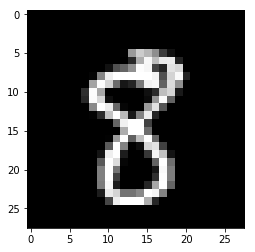

In [5]:
# display the image 46 in the data set
displayImage(X_train[46])

### Step 3 : prepare the data and train the model

In [66]:
# flatten the data, MLP doesn't use the 2D structure of the data. 784 = 28*28
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
 
# normalize the values of the pixels from 0 to 1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [67]:
# the labels must be trnsformed from a 1d array to a 2d array
y_train = np.reshape(y_train,(-1,1))
y_test = np.reshape(y_test,(-1,1))

In [68]:
# one Hot encode the class labels
encoder = OneHotEncoder(sparse=False)
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

In [69]:
# define the model achitecture
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10)) #Last layer with one output per class
model.add(Activation('softmax')) #We want a score simlar to a probability for each class
 

In [72]:
# Use rmsprop to do the gradient descent see http://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf
# and http://cs231n.github.io/neural-networks-3/#ada
rms = RMSprop()
# The function to optimize is the cross entropy between the true label and the output (softmax) of the model
model.compile(loss='categorical_crossentropy', optimizer=rms, metrics=["accuracy"])
 
# train the model
model.fit(X_train, y_train,batch_size=128, nb_epoch=20,verbose=2,validation_data=(X_test, y_test))
 
# evaluate how the model does on the test set
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

/Users/vincentroy/anaconda/envs/py27/lib/python2.7/site-packages/keras/models.py:874: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 14s - loss: 0.2475 - acc: 0.9232 - val_loss: 0.0960 - val_acc: 0.9703
Epoch 2/20
 - 14s - loss: 0.1020 - acc: 0.9691 - val_loss: 0.0904 - val_acc: 0.9724
Epoch 3/20
 - 14s - loss: 0.0753 - acc: 0.9767 - val_loss: 0.0708 - val_acc: 0.9779
Epoch 4/20
 - 14s - loss: 0.0613 - acc: 0.9815 - val_loss: 0.0858 - val_acc: 0.9780
Epoch 5/20
 - 14s - loss: 0.0498 - acc: 0.9852 - val_loss: 0.0816 - val_acc: 0.9806
Epoch 6/20
 - 14s - loss: 0.0435 - acc: 0.9869 - val_loss: 0.0846 - val_acc: 0.9792
Epoch 7/20
 - 14s - loss: 0.0367 - acc: 0.9883 - val_loss: 0.0817 - val_acc: 0.9820
Epoch 8/20
 - 14s - loss: 0.0362 - acc: 0.9897 - val_loss: 0.0878 - val_acc: 0.9801
Epoch 9/20
 - 15s - loss: 0.0318 - acc: 0.9910 - val_loss: 0.0808 - val_acc: 0.9830
Epoch 10/20
 - 15s - loss: 0.0287 - acc: 0.9918 - val_loss: 0.0901 - val_acc: 0.9826
Epoch 11/20
 - 14s - loss: 0.0275 - acc: 0.9919 - val_loss: 0.0793 - val_acc: 0.9840
Epoch 12/20
 - 14s - los

# Step 4 : validate the model

In [95]:
# make a prediction on the first image
res = model.predict(X_test[1:2,:])

In [91]:
# see what the label is for th
y_test[1,:]

array([ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

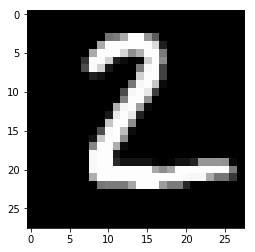

In [93]:
displayImage(X_test[1].reshape((28,28)))